# 공공 인공지능 Open API 활용

### 객체 검출(Object Detection)

In [1]:
with open('../static/keys/etri_ai_key.txt') as kfile:
            eai_key = kfile.read(100)

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [3]:
import os

In [4]:
image_file = '../static/upload/park.jpg'
_, image_type = os.path.splitext(image_file)
image_type

'.jpg'

In [5]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [6]:
with open(image_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode('utf8')

In [7]:
request_json = {
    "request_id": "reserved field",
    "access_key": eai_key,
    "argument": {
        "file": image_contents,
        "type": image_type
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [9]:
print("[responseCode]", response.status)

[responseCode] 200


In [10]:
response.data

b'{"request_id":"reserved field","result":0,"return_type":"com.google.gson.JsonObject","return_object":{"data":[{"class":"person","confidence":"0.983394","x":"809","y":"228","width":"58","height":"167"},{"class":"person","confidence":"0.971152","x":"599","y":"237","width":"90","height":"217"},{"class":"person","confidence":"0.969667","x":"690","y":"237","width":"68","height":"210"},{"class":"person","confidence":"0.901464","x":"854","y":"224","width":"40","height":"164"},{"class":"person","confidence":"0.892035","x":"721","y":"255","width":"46","height":"182"},{"class":"elephant","confidence":"0.998926","x":"78","y":"121","width":"272","height":"201"}]}}'

In [11]:
import json
result = json.loads(response.data)
result

{'request_id': 'reserved field',
 'result': 0,
 'return_type': 'com.google.gson.JsonObject',
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.983394',
    'x': '809',
    'y': '228',
    'width': '58',
    'height': '167'},
   {'class': 'person',
    'confidence': '0.971152',
    'x': '599',
    'y': '237',
    'width': '90',
    'height': '217'},
   {'class': 'person',
    'confidence': '0.969667',
    'x': '690',
    'y': '237',
    'width': '68',
    'height': '210'},
   {'class': 'person',
    'confidence': '0.901464',
    'x': '854',
    'y': '224',
    'width': '40',
    'height': '164'},
   {'class': 'person',
    'confidence': '0.892035',
    'x': '721',
    'y': '255',
    'width': '46',
    'height': '182'},
   {'class': 'elephant',
    'confidence': '0.998926',
    'x': '78',
    'y': '121',
    'width': '272',
    'height': '201'}]}}

In [12]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'person',
  'confidence': '0.983394',
  'x': '809',
  'y': '228',
  'width': '58',
  'height': '167'},
 {'class': 'person',
  'confidence': '0.971152',
  'x': '599',
  'y': '237',
  'width': '90',
  'height': '217'},
 {'class': 'person',
  'confidence': '0.969667',
  'x': '690',
  'y': '237',
  'width': '68',
  'height': '210'},
 {'class': 'person',
  'confidence': '0.901464',
  'x': '854',
  'y': '224',
  'width': '40',
  'height': '164'},
 {'class': 'person',
  'confidence': '0.892035',
  'x': '721',
  'y': '255',
  'width': '46',
  'height': '182'},
 {'class': 'elephant',
  'confidence': '0.998926',
  'x': '78',
  'y': '121',
  'width': '272',
  'height': '201'}]

In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

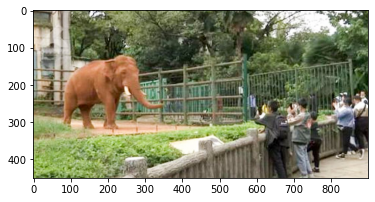

In [14]:
image = Image.open(image_file)
plt.imshow(image);

In [15]:
draw = ImageDraw.Draw(image)

In [16]:
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))
    draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

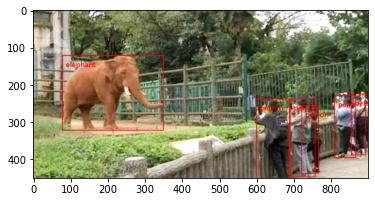

In [17]:
plt.imshow(image);

In [18]:
image.save('object.'+image_type)

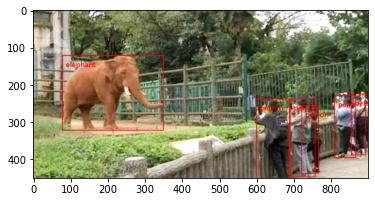

In [21]:
plt.imshow(image);